## Experiment to compare performance of Red Black Tree and AVL Tree

In [1]:
import numpy as np
import time

In [2]:

#RBTree Implementation Source:https://github.com/headius/redblack/blob/master/red_black_tree.py

class Node:

    RED = True
    BLACK = False

    def __init__(self, key, color=RED):
        if not type(color) == bool:
            raise TypeError('Bad value for color parameter, expected True/False but given %s' % color)
        self.color = color
        self.key = key
        self.left = self.right = self.parent = NilNode.instance()

    def __str__(self, level=0, indent='   '):
        s = level * indent + str(self.key)
        if self.left:
            s = s + '\n' + self.left.__str__(level + 1, indent)
        if self.right:
            s = s + '\n' + self.right.__str__(level + 1, indent)
        return s

    def __nonzero__(self):
        return True

    def __bool__(self):
        return True


class NilNode(Node):

    __instance__ = None

    @classmethod
    def instance(self):
        if self.__instance__ is None:
            self.__instance__ = NilNode()
        return self.__instance__

    def __init__(self):
        self.color = Node.BLACK
        self.key = None
        self.left = self.right = self.parent = None

    def __nonzero__(self):
        return False

    def __bool__(self):
        return False


class RedBlackTree:

    def __init__(self):
        self.root = NilNode.instance()
        self.size = 0

    def __str__(self):
        return '(root.size = %d)\n' % self.size + str(self.root)
    
    #not present in original source
    def start_rot_count(self):
        self.rotCount=0
    
    #not present in original source
    def get_rot_count(self):        
        return self.rotCount        
    
    #not present in original source
    def get_hieght(self):
        return self.maxDepth(self.root)
    
    #not present in original source
    def maxDepth(self,node) :
        if (node==None):
            return 0
        else   :
            lDepth = self.maxDepth(node.left)# compute the depth of each subtree
            rDepth = self.maxDepth(node.right)
        # use the larger one
        if (lDepth > rDepth):
            return(lDepth+1)
        else:
            return(rDepth+1)

    def add(self, key):
        self.insert(Node(key))

    def insert(self, x):
        self.__insert_helper(x)

        x.color = Node.RED
        while x != self.root and x.parent.color == Node.RED:
            if x.parent == x.parent.parent.left:
                y = x.parent.parent.right
                if y and y.color == Node.RED:
                    x.parent.color = Node.BLACK
                    y.color = Node.BLACK
                    x.parent.parent.color = Node.RED
                    x = x.parent.parent
                else:
                    if x == x.parent.right:
                        x = x.parent
                        self.__left_rotate(x)
                    x.parent.color = Node.BLACK
                    x.parent.parent.color = Node.RED
                    self.__right_rotate(x.parent.parent)
            else:
                y = x.parent.parent.left
                if y and y.color == Node.RED:
                    x.parent.color = Node.BLACK
                    y.color = Node.BLACK
                    x.parent.parent.color = Node.RED
                    x = x.parent.parent
                else:
                    if x == x.parent.left:
                        x = x.parent
                        self.__right_rotate(x)
                    x.parent.color = Node.BLACK
                    x.parent.parent.color = Node.RED
                    self.__left_rotate(x.parent.parent)
        self.root.color = Node.BLACK

    def delete(self, z):
        if not z.left or not z.right:
            y = z
        else:
            y = self.successor(z)
        if not y.left:
            x = y.right
        else:
            x = y.left
        x.parent = y.parent

        if not y.parent:
            self.root = x
        else:
            if y == y.parent.left:
                y.parent.left = x
            else:
                y.parent.right = x

        if y != z:
            z.key = y.key

        if y.color == Node.BLACK:
            self.__delete_fixup(x)

        self.size -= 1
        return y

    def minimum(self, x=None):
        if x is None:
            x = self.root
        while x.left:
            x = x.left
        return x

    def maximum(self, x=None):
        if x is None:
            x = self.root
        while x.right:
            x = x.right
        return x

    def successor(self, x):
        if x.right:
            return self.minimum(x.right)
        y = x.parent
        while y and x == y.right:
            x = y
            y = y.parent
        return y

    def predecessor(self, x):
        if x.left:
            return self.maximum(x.left)
        y = x.parent
        while y and x == y.left:
            x = y
            y = y.parent
        return y

    def inorder_walk(self, x=None):
        if x is None:
            x = self.root
        x = self.minimum()
        while x:
            yield x.key
            x = self.successor(x)

    def reverse_inorder_walk(self, x=None):
        if x is None:
            x = self.root
        x = self.maximum()
        while x:
            yield x.key
            x = self.predecessor(x)

    def search(self, key, x=None):
        if x is None:
            x = self.root
        while x and x.key != key:
            if key < x.key:
                x = x.left
            else:
                x = x.right
        return x

    def is_empty(self):
        return bool(self.root)

    def black_height(self, x=None):
        if x is None:
            x = self.root
        height = 0
        while x:
            x = x.left
            if not x or x.is_black():
                height += 1
        return height

    def __left_rotate(self, x):
        
        self.rotCount+=1
        if not x.right:
            raise 'x.right is nil!'
        y = x.right
        x.right = y.left
        if y.left:
            y.left.parent = x
        y.parent = x.parent
        if not x.parent:
            self.root = y
        else:
            if x == x.parent.left:
                x.parent.left = y
            else:
                x.parent.right = y
        y.left = x
        x.parent = y

    def __right_rotate(self, x):
        
        self.rotCount+=1
        if not x.left:
            raise 'x.left is nil!'
        y = x.left
        x.left = y.right
        if y.right:
            y.right.parent = x
        y.parent = x.parent
        if not x.parent:
            self.root = y
        else:
            if x == x.parent.left:
                x.parent.left = y
            else:
                x.parent.right = y
        y.right = x
        x.parent = y

    def __insert_helper(self, z):
        y = NilNode.instance()
        x = self.root
        while x:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right

        z.parent = y
        if not y:
            self.root = z
        else:
            if z.key < y.key:
                y.left = z
            else:
                y.right = z

        self.size += 1

    def __delete_fixup(self, x):
        while x != self.root and x.color == Node.BLACK:
            if x == x.parent.left:
                w = x.parent.right
                if w.color == Node.RED:
                    w.color = Node.BLACK
                    x.parent.color = Node.RED
                    self.__left_rotate(x.parent)
                    w = x.parent.right
                if w.left.color == Node.BLACK and w.right.color \
                    == Node.BLACK:
                    w.color = Node.RED
                    x = x.parent
                else:
                    if w.right.color == Node.BLACK:
                        w.left.color = Node.BLACK
                        w.color = Node.RED
                        self.__right_rotate(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = Node.BLACK
                    w.right.color = Node.BLACK
                    self.__left_rotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.color == Node.RED:
                    w.color = Node.BLACK
                    x.parent.color = Node.RED
                    self.__right_rotate(x.parent)
                    w = x.parent.left
                if w.right.color == Node.BLACK and w.left.color \
                    == Node.BLACK:
                    w.color = Node.RED
                    x = x.parent
                else:
                    if w.left.color == Node.BLACK:
                        w.right.color = Node.BLACK
                        w.color = Node.RED
                        self.__left_rotate(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = Node.BLACK
                    w.left.color = Node.BLACK
                    self.__right_rotate(x.parent)
                    x = self.root
        x.color = Node.BLACK


In [3]:

# AVL Tree source:https://github.com/pgrafov/python-avl-tree/blob/master/pyavltree.py

class AVLNode:

    def __init__(self, key):
        self.key = key
        self.parent = None
        self.leftChild = None
        self.rightChild = None
        self.height = 0

    def __str__(self):
        return str(self.key) + '(' + str(self.height) + ')'

    def is_leaf(self):
        return self.height == 0

    def max_children_height(self):
        if self.leftChild and self.rightChild:
            return max(self.leftChild.height, self.rightChild.height)
        elif self.leftChild and not self.rightChild:
            return self.leftChild.height
        elif not self.leftChild and self.rightChild:
            return self.rightChild.height
        else:
            return -1

    def balance(self):
        return ((self.leftChild.height if self.leftChild else -1)) \
            - ((self.rightChild.height if self.rightChild else -1))


class AVLTree:

    def __init__(self, *args):
        self.rootNode = None
        self.elements_count = 0
        self.rebalance_count = 0
        if len(args) == 1:
            for i in args[0]:
                self.insert(i)

    #not present in original source
    def start_rot_count(self):
        self.rotCount=0
    
    #not present in original source
    def get_rot_count(self):        
        return self.rotCount 
    
    def height(self):
        if self.rootNode:
            return self.rootNode.height
        else:
            return 0

    def rebalance(self, node_to_rebalance):
        self.rebalance_count += 1
        A = node_to_rebalance
        F = A.parent  # allowed to be NULL
        if node_to_rebalance.balance() == -2:
            if node_to_rebalance.rightChild.balance() <= 0:
                self.rotCount+=1
                #"""Rebalance, case RRC """
                B = A.rightChild
                C = B.rightChild
                assert not A is None and not B is None and not C is None
                A.rightChild = B.leftChild
                if A.rightChild:
                    A.rightChild.parent = A
                B.leftChild = A
                A.parent = B
                if F is None:
                    self.rootNode = B
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = B
                    else:
                        F.leftChild = B
                    B.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B.parent)
            else:
                self.rotCount+=2
                #"""Rebalance, case RLC """
                B = A.rightChild
                C = B.leftChild
                assert not A is None and not B is None and not C is None
                B.leftChild = C.rightChild
                if B.leftChild:
                    B.leftChild.parent = B
                A.rightChild = C.leftChild
                if A.rightChild:
                    A.rightChild.parent = A
                C.rightChild = B
                B.parent = C
                C.leftChild = A
                A.parent = C
                if F is None:
                    self.rootNode = C
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = C
                    else:
                        F.leftChild = C
                    C.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B)
        else:
            assert node_to_rebalance.balance() == +2
            if node_to_rebalance.leftChild.balance() >= 0:
                #"""Rebalance, case LLC """
                self.rotCount+=1
                B = A.leftChild
                C = B.leftChild
                assert not A is None and not B is None and not C is None
                A.leftChild = B.rightChild
                if A.leftChild:
                    A.leftChild.parent = A
                B.rightChild = A
                A.parent = B
                if F is None:
                    self.rootNode = B
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = B
                    else:
                        F.leftChild = B
                    B.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B.parent)
            else:
                #"""Rebalance, case LRC """
                self.rotCount+=2
                B = A.leftChild
                C = B.rightChild
                assert not A is None and not B is None and not C is None
                A.leftChild = C.rightChild
                if A.leftChild:
                    A.leftChild.parent = A
                B.rightChild = C.leftChild
                if B.rightChild:
                    B.rightChild.parent = B
                C.leftChild = B
                B.parent = C
                C.rightChild = A
                A.parent = C
                if F is None:
                    self.rootNode = C
                    self.rootNode.parent = None
                else:
                    if F.rightChild == A:
                        F.rightChild = C
                    else:
                        F.leftChild = C
                    C.parent = F
                self.recompute_heights(A)
                self.recompute_heights(B)

    def sanity_check(self, *args):
        if len(args) == 0:
            node = self.rootNode
        else:
            node = args[0]
        if node is None or node.is_leaf() and node.parent is None:

            # trival - no sanity check needed, as either the tree is empty or there is only one node in the tree

            pass
        else:
            if node.height != node.max_children_height() + 1:
                raise Exception('Invalid height for node ' + str(node)
                                + ': ' + str(node.height)
                                + ' instead of '
                                + str(node.max_children_height() + 1)
                                + '!')

            balFactor = node.balance()

            # Test the balance factor

            if not (balFactor >= -1 and balFactor <= 1):
                raise Exception('Balance factor for node ' + str(node)
                                + ' is ' + str(balFactor) + '!')

            # Make sure we have no circular references

            if not node.leftChild != node:
                raise Exception('Circular reference for node '
                                + str(node)
                                + ': node.leftChild is node!')
            if not node.rightChild != node:
                raise Exception('Circular reference for node '
                                + str(node)
                                + ': node.rightChild is node!')

            if node.leftChild:
                if not node.leftChild.parent == node:
                    raise Exception('Left child of node ' + str(node)
                                    + " doesn't know who his father is!"
                                    )
                if not node.leftChild.key <= node.key:
                    raise Exception('Key of left child of node '
                                    + str(node)
                                    + ' is greater than key of his parent!'
                                    )
                self.sanity_check(node.leftChild)

            if node.rightChild:
                if not node.rightChild.parent == node:
                    raise Exception('Right child of node ' + str(node)
                                    + " doesn't know who his father is!"
                                    )
                if not node.rightChild.key >= node.key:
                    raise Exception('Key of right child of node '
                                    + str(node)
                                    + ' is less than key of his parent!'
                                    )
                self.sanity_check(node.rightChild)

    def recompute_heights(self, start_from_node):
        changed = True
        node = start_from_node
        while node and changed:
            old_height = node.height
            node.height = (node.max_children_height()
                           + 1 if node.rightChild
                           or node.leftChild else 0)
            changed = node.height != old_height
            node = node.parent

    def add_as_child(self, parent_node, child_node):
        node_to_rebalance = None
        if child_node.key < parent_node.key:
            if not parent_node.leftChild:
                parent_node.leftChild = child_node
                child_node.parent = parent_node
                if parent_node.height == 0:
                    node = parent_node
                    while node:
                        node.height = node.max_children_height() + 1
                        if not node.balance() in [-1, 0, 1]:
                            node_to_rebalance = node
                            break  # we need the one that is furthest from the root
                        node = node.parent
            else:
                self.add_as_child(parent_node.leftChild, child_node)
        else:
            if not parent_node.rightChild:
                parent_node.rightChild = child_node
                child_node.parent = parent_node
                if parent_node.height == 0:
                    node = parent_node
                    while node:
                        node.height = node.max_children_height() + 1
                        if not node.balance() in [-1, 0, 1]:
                            node_to_rebalance = node
                            break  # we need the one that is furthest from the root
                        node = node.parent
            else:
                self.add_as_child(parent_node.rightChild, child_node)

        if node_to_rebalance:
            self.rebalance(node_to_rebalance)

    def insert(self, key):
        new_node = AVLNode(key)
        if not self.rootNode:
            self.rootNode = new_node
        else:
            if not self.find(key):
                self.elements_count += 1
                self.add_as_child(self.rootNode, new_node)

    def find_biggest(self, start_node):
        node = start_node
        while node.rightChild:
            node = node.rightChild
        return node

    def find_smallest(self, start_node):
        node = start_node
        while node.leftChild:
            node = node.leftChild
        return node

    def inorder_non_recursive(self):
        node = self.rootNode
        retlst = []
        while node.leftChild:
            node = node.leftChild
        while node:
            retlst += [node.key]
            if node.rightChild:
                node = node.rightChild
                while node.leftChild:
                    node = node.leftChild
            else:
                while node.parent and node == node.parent.rightChild:
                    node = node.parent
                node = node.parent
        return retlst

    def preorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        retlst += [node.key]
        if node.leftChild:
            retlst = self.preorder(node.leftChild, retlst)
        if node.rightChild:
            retlst = self.preorder(node.rightChild, retlst)
        return retlst

    def inorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        if node.leftChild:
            retlst = self.inorder(node.leftChild, retlst)
        retlst += [node.key]
        if node.rightChild:
            retlst = self.inorder(node.rightChild, retlst)
        return retlst

    def postorder(self, node, retlst=None):
        if retlst is None:
            retlst = []
        if node.leftChild:
            retlst = self.postorder(node.leftChild, retlst)
        if node.rightChild:
            retlst = self.postorder(node.rightChild, retlst)
        retlst += [node.key]
        return retlst

    def as_list(self, pre_in_post):
        if not self.rootNode:
            return []
        if pre_in_post == 0:
            return self.preorder(self.rootNode)
        elif pre_in_post == 1:
            return self.inorder(self.rootNode)
        elif pre_in_post == 2:
            return self.postorder(self.rootNode)
        elif pre_in_post == 3:
            return self.inorder_non_recursive()

    def find(self, key):
        return self.find_in_subtree(self.rootNode, key)

    def find_in_subtree(self, node, key):
        if node is None:
            return None  # key not found
        if key < node.key:
            return self.find_in_subtree(node.leftChild, key)
        elif key > node.key:
            return self.find_in_subtree(node.rightChild, key)
        else:

               # key is equal to node key

            return node

    def remove(self, key):

        # first find

        node = self.find(key)

        if not node is None:
            self.elements_count -= 1

            #     There are three cases:
            #
            #     1) The node is a leaf.  Remove it and return.
            #
            #     2) The node is a branch (has only 1 child). Make the pointer to this node
            #        point to the child of this node.
            #
            #     3) The node has two children. Swap items with the successor
            #        of the node (the smallest item in its right subtree) and
            #        delete the successor from the right subtree of the node.

            if node.is_leaf():
                self.remove_leaf(node)
            elif bool(node.leftChild) ^ bool(node.rightChild):
                self.remove_branch(node)
            else:
                assert node.leftChild and node.rightChild
                self.swap_with_successor_and_remove(node)

    def remove_leaf(self, node):
        parent = node.parent
        if parent:
            if parent.leftChild == node:
                parent.leftChild = None
            else:
                assert parent.rightChild == node
                parent.rightChild = None
            self.recompute_heights(parent)
        else:
            self.rootNode = None
        del node

        # rebalance

        node = parent
        while node:
            if not node.balance() in [-1, 0, 1]:
                self.rebalance(node)
            node = node.parent

    def remove_branch(self, node):
        parent = node.parent
        if parent:
            if parent.leftChild == node:
                parent.leftChild = node.rightChild or node.leftChild
            else:
                assert parent.rightChild == node
                parent.rightChild = node.rightChild or node.leftChild
            if node.leftChild:
                node.leftChild.parent = parent
            else:
                assert node.rightChild
                node.rightChild.parent = parent
            self.recompute_heights(parent)
        del node

        # rebalance

        node = parent
        while node:
            if not node.balance() in [-1, 0, 1]:
                self.rebalance(node)
            node = node.parent

    def swap_with_successor_and_remove(self, node):
        successor = self.find_smallest(node.rightChild)
        self.swap_nodes(node, successor)
        assert node.leftChild is None
        if node.height == 0:
            self.remove_leaf(node)
        else:
            self.remove_branch(node)

    def swap_nodes(self, node1, node2):
        assert node1.height > node2.height
        parent1 = node1.parent
        leftChild1 = node1.leftChild
        rightChild1 = node1.rightChild
        parent2 = node2.parent
        assert not parent2 is None
        assert parent2.leftChild == node2 or parent2 == node1
        leftChild2 = node2.leftChild
        assert leftChild2 is None
        rightChild2 = node2.rightChild

        # swap heights

        tmp = node1.height
        node1.height = node2.height
        node2.height = tmp

        if parent1:
            if parent1.leftChild == node1:
                parent1.leftChild = node2
            else:
                assert parent1.rightChild == node1
                parent1.rightChild = node2
            node2.parent = parent1
        else:
            self.rootNode = node2
            node2.parent = None

        node2.leftChild = leftChild1
        leftChild1.parent = node2
        node1.leftChild = leftChild2  # None
        node1.rightChild = rightChild2
        if rightChild2:
            rightChild2.parent = node1
        if not parent2 == node1:
            node2.rightChild = rightChild1
            rightChild1.parent = node2

            parent2.leftChild = node1
            node1.parent = parent2
        else:
            node2.rightChild = node1
            node1.parent = node2




In [4]:
#generate random sequence of elements
def random_seq(count):
    import numpy as np
    arr=np.arange(count,dtype=np.int64)
    np.random.shuffle(arr)
    return arr



In [20]:
#for RBTree
rbtOrderedInsertTime=[]
rbtRotOrderedInsert=[]
rbtHieghtAfterOrderedInsert=[]
rbtOrderedSearchTime=[]
rbtOrderedDeletionTime=[]
rbtRotOrderedDeletion=[]

rbtRandomInsertTime=[]
rbtRotRandomInsert=[]
rbtHieghtAfterRandomInsert=[]
rbtRandomSearchTime=[]
rbtRandomDeletionTime=[]
rbtRotRandomDeletion=[]

#for AVLTree
avltOrderedInsertTime=[]
avltRotOrderedInsert=[]
avltHieghtAfterOrderedInsert=[]
avltOrderedSearchTime=[]
avltOrderedDeletionTime=[]
avltRotOrderedDeletion=[]

avltRandomInsertTime=[]
avltRotRandomInsert=[]
avltHieghtAfterRandomInsert=[]
avltRandomSearchTime=[]
avltRandomDeletionTime=[]
avltRotRandomDeletion=[]

N=np.arange(1,6,dtype=np.int64)

m=10000 #multiplier
for n in N:
    #Tree objects
    rbt1=RedBlackTree()
    rbt2=RedBlackTree()
    avl1=AVLTree()
    avl2=AVLTree()
    orderSeq=np.arange(n*m,dtype=np.int64)
    randomSeq=random_seq(n*m)
    
    #RBTree
    
    #RBT ordered Insertion
    s=time.clock()
    rbt1.start_rot_count()
    for x in orderSeq:
        rbt1.add(x)
    rotCount=rbt1.get_rot_count()
    e=time.clock()    
    rbtOrderedInsertTime.append(e-s) 
    #RBT Rotations during ordered Insertion
    rbtRotOrderedInsert.append(rotCount)
    #RBT height after ordered insertion
    h=rbt1.get_hieght()
    rbtHieghtAfterOrderedInsert.append(h)
    
    #RBT ordered search
    s=time.clock()
    for x in orderSeq:
        rbt1.search(x)
    e=time.clock()
    rbtOrderedSearchTime.append(e-s)
    
    #RBT Ordered Deletion
    s=time.clock()
    rbt1.start_rot_count()
    for x in orderSeq:        
        rbt1.delete(rbt1.search(x))  
    rotCount=rbt1.get_rot_count()
    e=time.clock()
    rbtOrderedDeletionTime.append(e-s)
    #RBT Rotations during ordered deletion
    rbtRotOrderedDeletion.append(rotCount)
    
    #RBT Random Insertion
    s=time.clock()
    rbt2.start_rot_count()
    for x in randomSeq:
        rbt2.add(x)
    rotCount=rbt2.get_rot_count()
    e=time.clock()
    rbtRandomInsertTime.append(e-s) 
    #RBT Rotations during random Insertion
    rbtRotRandomInsert.append(rotCount)
    
    #RBT height after random insertion
    h=rbt2.get_hieght()
    rbtHieghtAfterRandomInsert.append(h)
    
    #RBT random search
    s=time.clock()
    for x in randomSeq:
        rbt2.search(x)
    e=time.clock()
    rbtRandomSearchTime.append(e-s)
    
    #RBT random Deletion
    s=time.clock()
    rbt2.start_rot_count()
    for x in randomSeq:
        rbt2.delete(rbt2.search(x))
    rotCount=rbt2.get_rot_count()
    e=time.clock()
    rbtRandomDeletionTime.append(e-s)
    #RBT Rotations during random Deletion
    rbtRotRandomDeletion.append(rotCount)
    
    #AVL Tree
    #AVL ordered Insertion
    s=time.clock()
    avl1.start_rot_count()
    for x in orderSeq:
        avl1.insert(x)
    rotCount=avl1.get_rot_count()
    e=time.clock()
    avltOrderedInsertTime.append(e-s) 
    #AVL Rotations during ordered Insertion
    avltRotOrderedInsert.append(rotCount)
    
    #AVL height after ordered insertion
    h=avl1.height()
    avltHieghtAfterOrderedInsert.append(h)
    
    
    #AVL ordered search
    s=time.clock()
    for x in orderSeq:
        avl1.find(x)
    e=time.clock()
    avltOrderedSearchTime.append(e-s)
    
    #AVL Ordered Deletion
    s=time.clock()
    avl1.start_rot_count()
    for x in orderSeq:
        avl1.remove(x)
    rotCount=avl1.get_rot_count()
    e=time.clock()
    avltOrderedDeletionTime.append(e-s)
    #AVL Rotations during ordered Deletion
    avltRotOrderedDeletion.append(rotCount)
    
    #AVL Random Insertion
    s=time.clock()
    avl2.start_rot_count()
    for x in randomSeq:
        avl2.insert(x)
    rotcount=avl2.get_rot_count()
    e=time.clock()
    avltRandomInsertTime.append(e-s) 
    #AVL Rotations during random Insertion
    avltRotRandomInsert.append(rotCount)
    
    #AVL height after random insertion
    h=avl2.height()
    avltHieghtAfterRandomInsert.append(h)
    
    #AVL random search
    s=time.clock()
    for x in randomSeq:
        avl2.find(x)
    e=time.clock()
    avltRandomSearchTime.append(e-s)
    
    #AVL random Deletion
    s=time.clock()
    avl2.start_rot_count()
    for x in randomSeq:
        avl2.remove(x)
    rotCount=avl2.get_rot_count()
    e=time.clock()
    avltRandomDeletionTime.append(e-s)
    #AVL Rotations during Random Deletion
    avltRotRandomDeletion.append(rotCount)
    
        
    


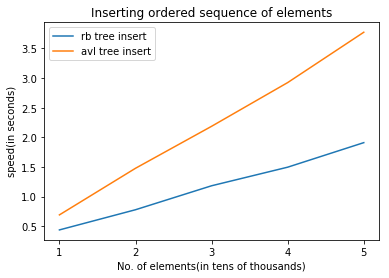

In [38]:
import matplotlib.pyplot as plt

plt.plot(N,rbtOrderedInsertTime,label='rb tree insert')
plt.plot(N,avltOrderedInsertTime,label='avl tree insert')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Inserting ordered sequence of elements')
plt.legend()

plt.show()

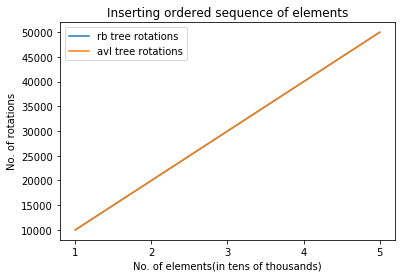

In [39]:
import matplotlib.pyplot as plt

plt.plot(N,rbtRotOrderedInsert,label='rb tree rotations')
plt.plot(N,avltRotOrderedInsert,label='avl tree rotations')
plt.xticks(N)
plt.ylabel('No. of rotations')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Inserting ordered sequence of elements')
plt.legend()

plt.show()

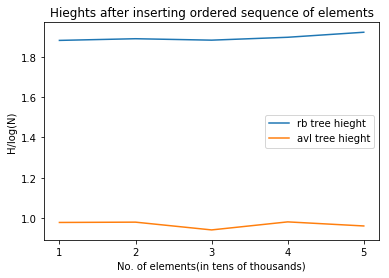

In [40]:
import matplotlib.pyplot as plt

plt.plot(N,np.divide(rbtHieghtAfterOrderedInsert,np.log2(N*m)),label='rb tree hieght')
plt.plot(N,np.divide(avltHieghtAfterOrderedInsert,np.log2(N*m)),label='avl tree hieght')
plt.xticks(N)
plt.ylabel('H/log(N)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Hieghts after inserting ordered sequence of elements')
plt.legend()

plt.show()

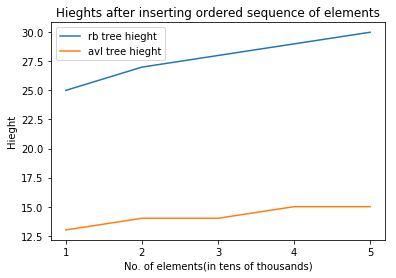

In [41]:
import matplotlib.pyplot as plt

plt.plot(N,rbtHieghtAfterOrderedInsert,label='rb tree hieght')
plt.plot(N,avltHieghtAfterOrderedInsert,label='avl tree hieght')
plt.xticks(N)
plt.ylabel('Hieght')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Hieghts after inserting ordered sequence of elements')
plt.legend()

plt.show()

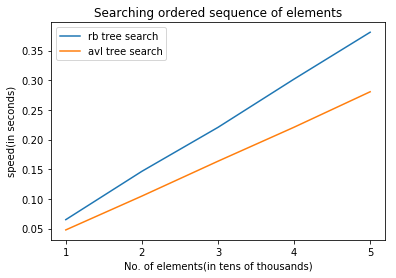

In [42]:
plt.plot(N,rbtOrderedSearchTime,label='rb tree search')
plt.plot(N,avltOrderedSearchTime,label='avl tree search')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Searching ordered sequence of elements')
plt.legend()

plt.show()

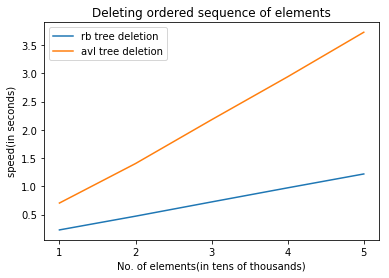

In [43]:
plt.plot(N,rbtOrderedDeletionTime,label='rb tree deletion')
plt.plot(N,avltOrderedDeletionTime,label='avl tree deletion')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Deleting ordered sequence of elements')
plt.legend()

plt.show()

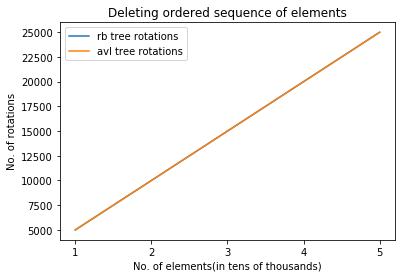

In [44]:
import matplotlib.pyplot as plt

plt.plot(N,rbtRotOrderedDeletion,label='rb tree rotations')
plt.plot(N,avltRotOrderedDeletion,label='avl tree rotations')
plt.xticks(N)
plt.ylabel('No. of rotations')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Deleting ordered sequence of elements')
plt.legend()

plt.show()

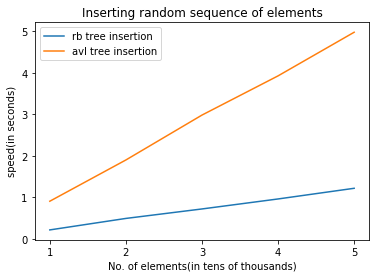

In [45]:
plt.plot(N,rbtRandomInsertTime,label='rb tree insertion')
plt.plot(N,avltRandomInsertTime,label='avl tree insertion')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Inserting random sequence of elements')
plt.legend()

plt.show()

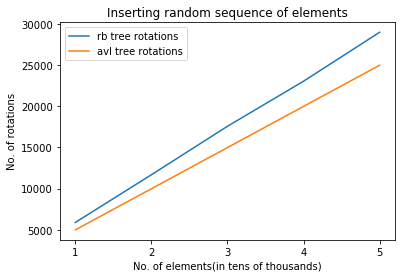

In [46]:
import matplotlib.pyplot as plt

plt.plot(N,rbtRotRandomInsert,label='rb tree rotations')
plt.plot(N,avltRotRandomInsert,label='avl tree rotations')
plt.xticks(N)
plt.ylabel('No. of rotations')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Inserting random sequence of elements')
plt.legend()

plt.show()

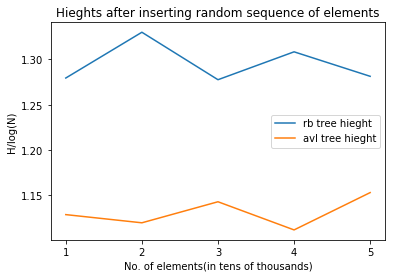

In [47]:
import matplotlib.pyplot as plt

plt.plot(N,np.divide(rbtHieghtAfterRandomInsert,np.log2(N*m)),label='rb tree hieght')
plt.plot(N,np.divide(avltHieghtAfterRandomInsert,np.log2(N*m)),label='avl tree hieght')
plt.xticks(N)
plt.ylabel('H/log(N)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Hieghts after inserting random sequence of elements')
plt.legend()

plt.show()

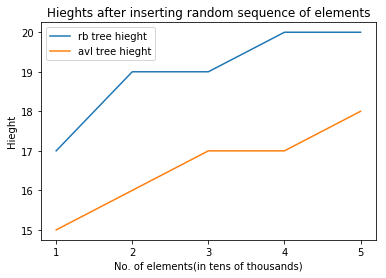

In [48]:
import matplotlib.pyplot as plt

plt.plot(N,rbtHieghtAfterRandomInsert,label='rb tree hieght')
plt.plot(N,avltHieghtAfterRandomInsert,label='avl tree hieght')
plt.xticks(N)
plt.ylabel('Hieght')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Hieghts after inserting random sequence of elements')
plt.legend()

plt.show()

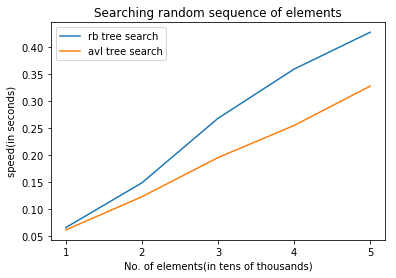

In [49]:
plt.plot(N,rbtRandomSearchTime,label='rb tree search')
plt.plot(N,avltRandomSearchTime,label='avl tree search')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Searching random sequence of elements')
plt.legend()

plt.show()

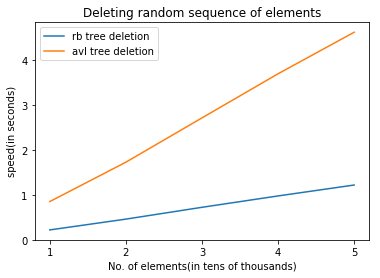

In [50]:
plt.plot(N,rbtRandomDeletionTime,label='rb tree deletion')
plt.plot(N,avltRandomDeletionTime,label='avl tree deletion')
plt.xticks(N)
plt.ylabel('speed(in seconds)')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Deleting random sequence of elements')
plt.legend()

plt.show()

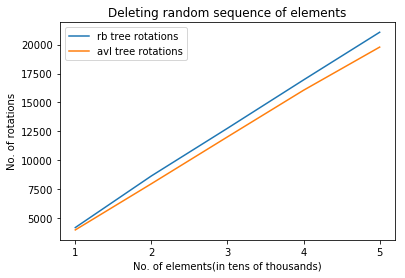

In [51]:
import matplotlib.pyplot as plt

plt.plot(N,rbtRotRandomDeletion,label='rb tree rotations')
plt.plot(N,avltRotRandomDeletion,label='avl tree rotations')
plt.xticks(N)
plt.ylabel('No. of rotations')
plt.xlabel('No. of elements(in tens of thousands)')
plt.title('Deleting random sequence of elements')
plt.legend()

plt.show()

In [52]:
import pandas as pd
indexlist=['ordered insertion','rotations during ordered insertion','hieght after ordered insertion','ordered searching','ordered deletion','rotations during ordered deletion','random insertion','rotations during random insertion','hieght after random insertion','random searching','random deletion','rotations during random deletion']
collist=['Red Black Tree','AVL Tree']
data=[]
for i in range(N.size):
    data.append([rbtOrderedInsertTime[i],avltOrderedInsertTime[i]])
    data.append([rbtRotOrderedInsert[i],avltRotOrderedInsert[i]])
    data.append([rbtHieghtAfterOrderedInsert[i],avltHieghtAfterOrderedInsert[i]])
    data.append([rbtOrderedSearchTime[i],avltOrderedSearchTime[i]])
    data.append([rbtOrderedDeletionTime[i],avltOrderedDeletionTime[i]])
    data.append([rbtRotOrderedDeletion[i],avltRotOrderedDeletion[i]])
    data.append([rbtRandomInsertTime[i],avltRandomInsertTime[i]])
    data.append([rbtRotRandomInsert[i],avltRotRandomInsert[i]])
    data.append([rbtHieghtAfterRandomInsert[i],avltHieghtAfterRandomInsert[i]])
    data.append([rbtRandomSearchTime[i],avltRandomSearchTime[i]])
    data.append([rbtRandomDeletionTime[i],avltRandomDeletionTime[i]])
    data.append([rbtRotRandomDeletion[i],avltRotRandomDeletion[i]])
    pd.DataFrame(data,indexlist,collist).to_csv('inputsize'+str(N[i]*m)+'.csv')
    data=[]
    